In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import gradio as gr
import matplotlib.pyplot as plt
import tempfile

'''
Importamos las bibliotecas necesarias, incluyendo:
    Pandas para el manejo de datos
    Scikit-learn para el modelado de regresión
    Matplotlib para la visualización.
'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
'''
Cargamos los datos del archivo CSV y seleccionamos las variables de interés:
    "PUNT_LECTURA_CRITICA" como la variable independiente (X)
    "PUNT_GLOBAL" como la variable dependiente (y).
'''

# Cargar los datos
data = pd.read_csv('C:/Users/JUAN_CRUZ_CASA/Desktop/AVDV2-47/LABS/acumulado_saber_11.csv')

# Seleccionar las variables de interés
X = data[['PUNT_LECTURA_CRITICA']]# Variable independiente
y = data[['PUNT_GLOBAL']]# Variable dependiente

C:\Users\JUAN_CRUZ_CASA\AppData\Local\Temp\ipykernel_8576\3727007747.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/JUAN_CRUZ_CASA/Desktop/AVDV2-47/LABS/acumulado_saber_11.csv')


In [4]:

'''
    Dividimos los datos en conjuntos de entrenamiento y prueba utilizando train_test_split.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

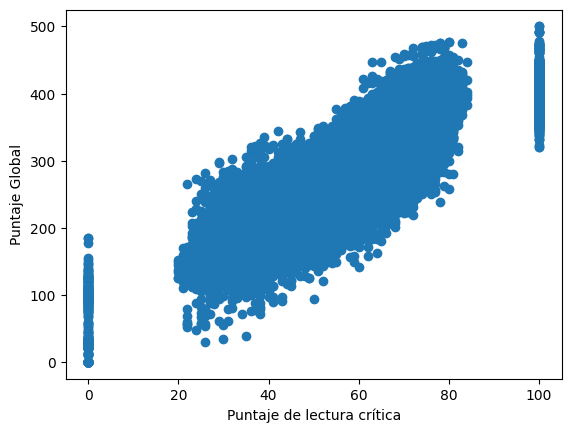

In [5]:
'''
    Es importante explorar las distribuciones de las variables antes de construir el modelo.
    Utilizaremos gráficos de dispersión para visualizar la relación entre las variables:
'''

plt.scatter(X, y)
plt.xlabel("Puntaje de lectura crítica")
plt.ylabel("Puntaje Global")
plt.show()

In [6]:
'''
    Inicializamos y entrenamos el modelo de regresión lineal utilizando los datos de entrenamiento.
'''
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
'''
    Realizamos predicciones sobre el conjunto de prueba y evaluamos el modelo calculando el error cuadrático medio (MSE) y el coeficiente de determinación (R cuadrado).
'''
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R cuadrado)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio", mse)
print("Coeficiente de determinación (R cuadrado):", r2)

Error cuadrático medio 523.3290962242144
Coeficiente de determinación (R cuadrado): 0.7994447243782566


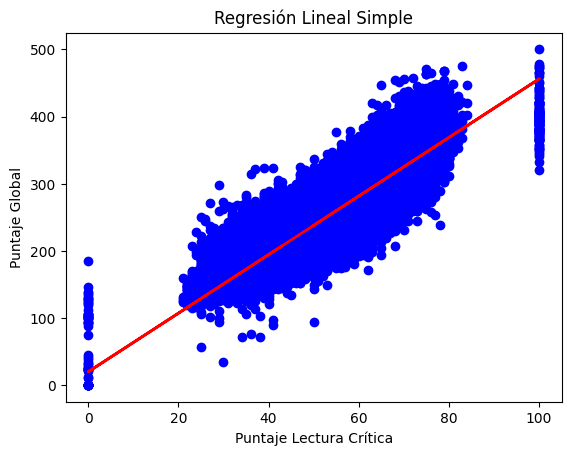

In [8]:
'''
    Visualizamos los resultados mediante un diagrama de dispersión que muestra la relación entre las variables y la línea de regresión ajustada.
'''

# Visualizar la relación entre las variables y la línea de regresión
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regresión Lineal Simple')
plt.xlabel('Puntaje Lectura Crítica')
plt.ylabel('Puntaje Global')
plt.show()

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


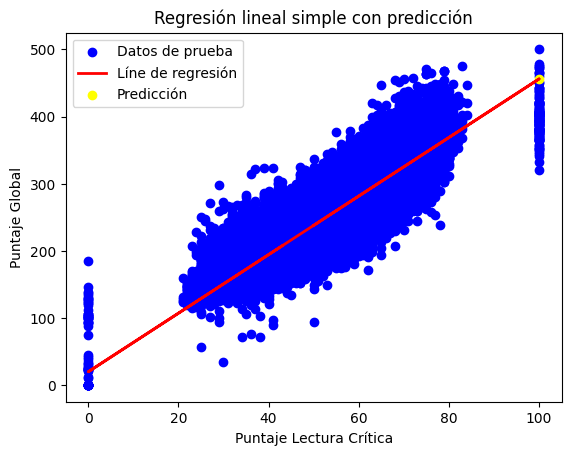

In [9]:
# Realizar una predicción para un valor específico de la variable independiente
puntaje_lectura_critica = 100
puntaje_global_predicho = model.predict([[puntaje_lectura_critica]])

# Visualizar la predicción en la gráfica de dispersión
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label = 'Líne de regresión')
plt.scatter(puntaje_lectura_critica,puntaje_global_predicho, color='yellow', label='Predicción')

plt.title('Regresión lineal simple con predicción')
plt.xlabel('Puntaje Lectura Crítica')
plt.ylabel('Puntaje Global')
plt.legend()
plt.show()

C:\Users\JUAN_CRUZ_CASA\AppData\Local\Temp\ipykernel_8576\166133486.py:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/JUAN_CRUZ_CASA/Desktop/AVDV2-47/LABS/acumulado_saber_11.csv')


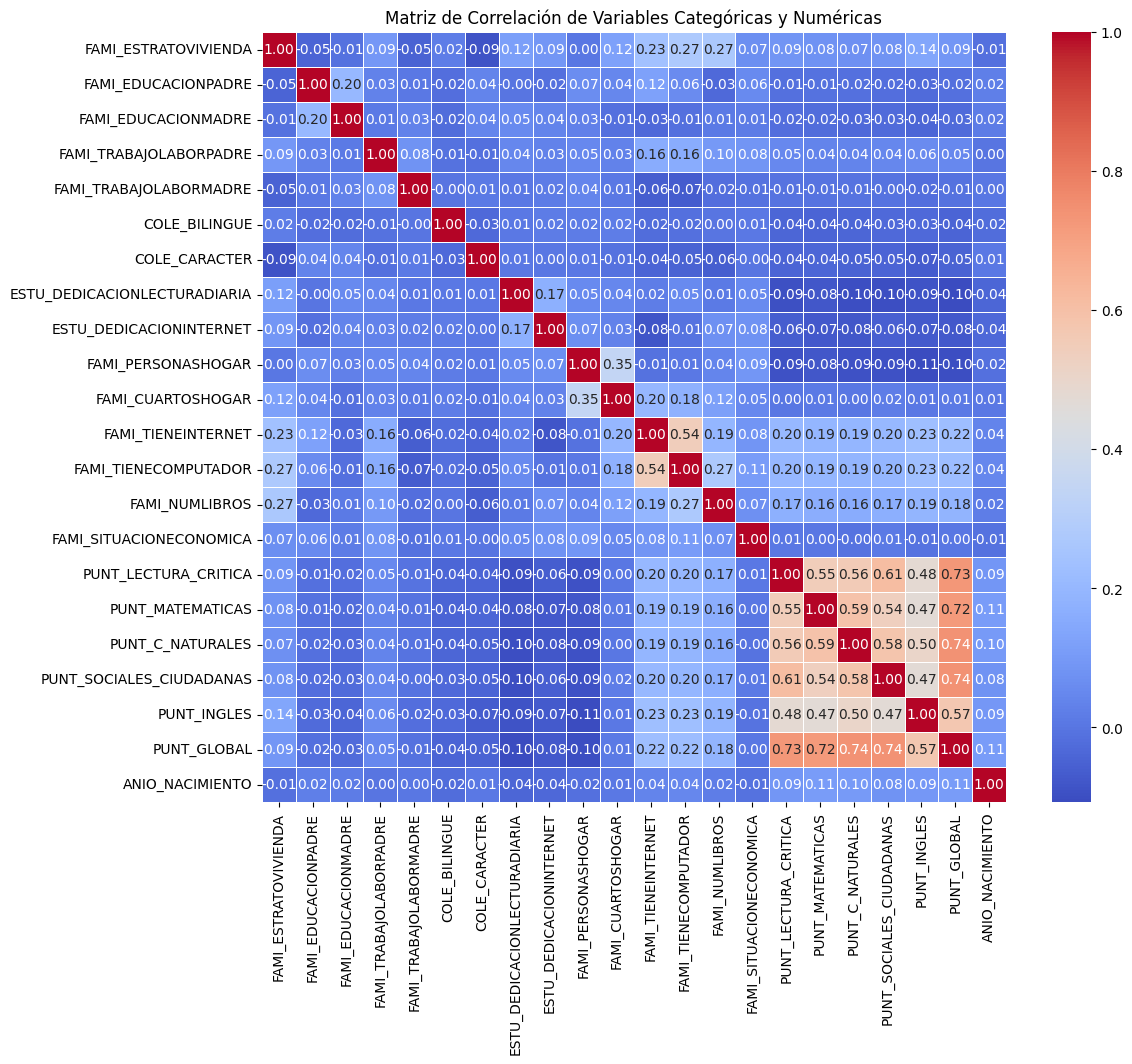

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
data = pd.read_csv('C:/Users/JUAN_CRUZ_CASA/Desktop/AVDV2-47/LABS/acumulado_saber_11.csv')

# Seleccionar variables categóricas
categorical_vars = ['FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
                    'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'COLE_BILINGUE',
                    'COLE_CARACTER', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET',
                    'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_TIENEINTERNET',
                    'FAMI_TIENECOMPUTADOR', 'FAMI_NUMLIBROS', 'FAMI_SITUACIONECONOMICA']

# Convertir todas las variables categóricas a cadenas de texto
data[categorical_vars] = data[categorical_vars].astype(str)

# Convertir variables categóricas a valores numéricos
label_encoder = LabelEncoder()
for var in categorical_vars:
    data[var] = label_encoder.fit_transform(data[var])

# Seleccionar variables numéricas
numeric_vars = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',
                'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL', 'ANIO_NACIMIENTO']

# Calcular la matriz de correlación entre variables categóricas y numéricas
correlation_matrix = data[categorical_vars + numeric_vars].corr(method='kendall')

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación de Variables Categóricas y Numéricas')

# Mostrar el mapa de calor
plt.show()

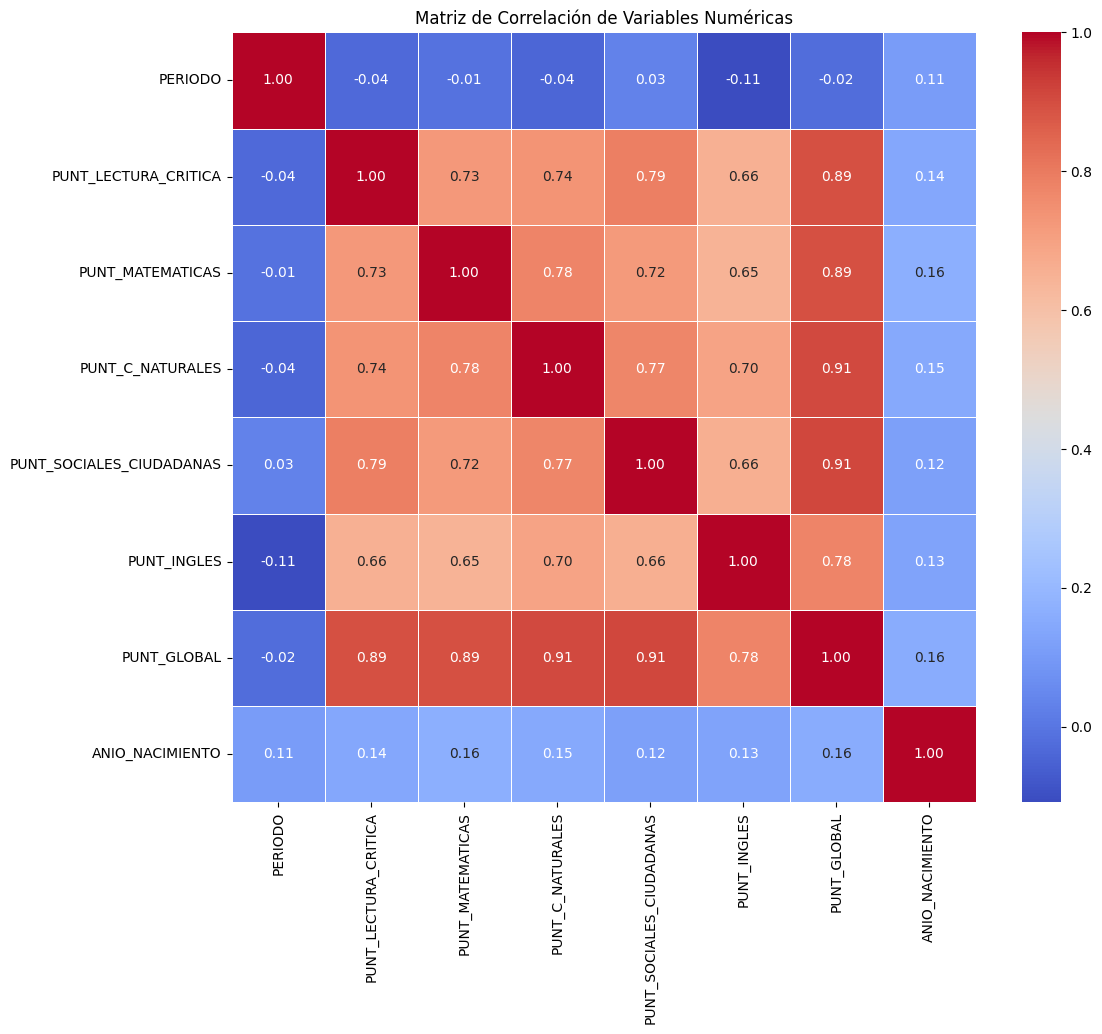

In [11]:
# Cargar los datos


# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64','int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación de Variables Numéricas')

# Mostrar el mapa de calor
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
X = data[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
y = data['PUNT_GLOBAL']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

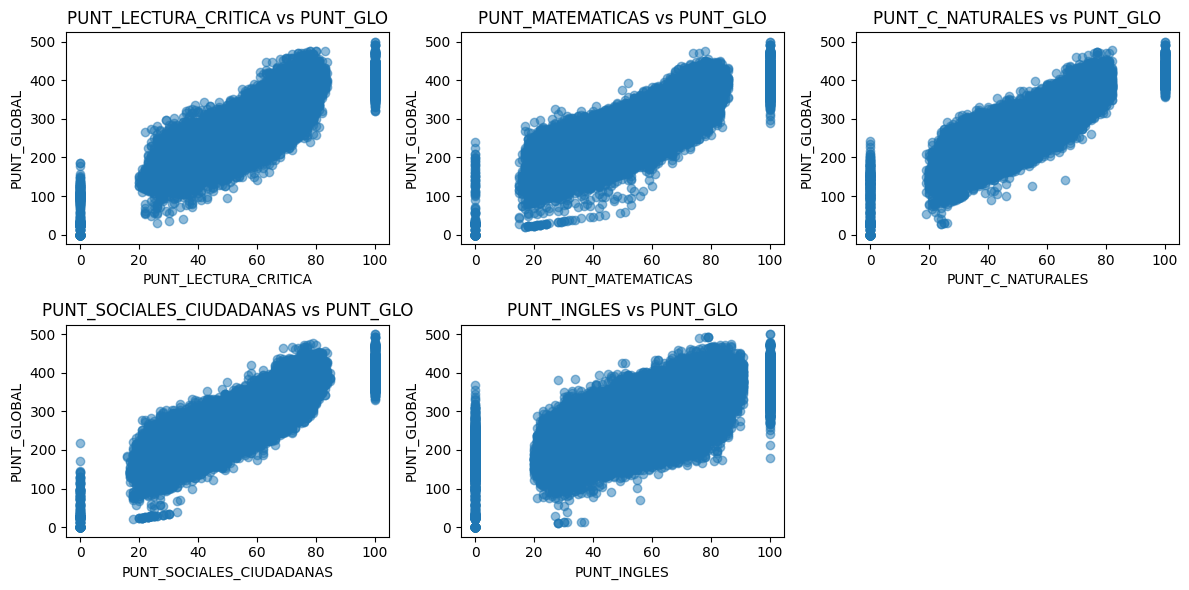

In [15]:
# Grafico de dispersión
plt.figure(figsize=(12, 6))
for i, col in enumerate(X.columns):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[col], y, alpha=0.5)
    plt.title(f'{col} vs PUNT_GLO')
    plt.xlabel(col)
    plt.ylabel('PUNT_GLOBAL')
plt.tight_layout()
plt.show()

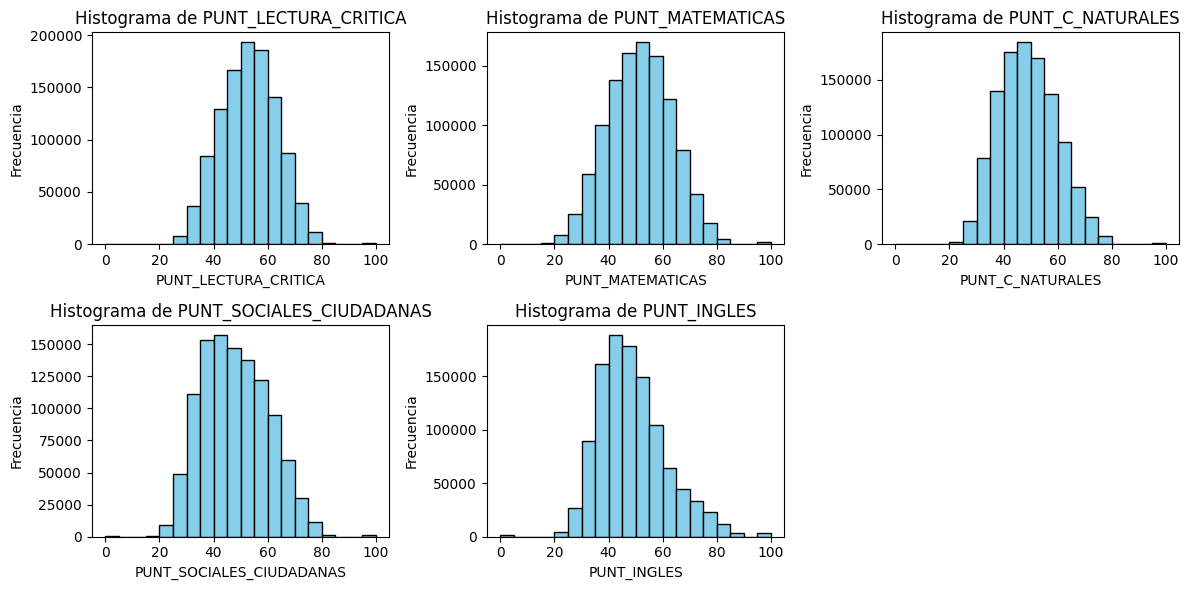

In [16]:
# Gráfico de histograma para cada variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(X.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(X[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Imputemos valores faltantes utilizando SimpleImputer:
from sklearn.impute import SimpleImputer

# Imputar valores faltantes en el conjunto de datos
imputer = SimpleImputer(strategy='mean')  # Puedes cambiar 'mean' por 'median' u otra estrategia
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Imputar valores faltantes en el conjunto de prueba
X_test_imputed = imputer.transform(X_test)

# Inicializar y entrenar el modelo de regresión lineal con los datos imputados
model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

In [ ]:

# Paso 6: Realizar predicciones utilizando el conjunto de prueba imputado y evaluar el modelo
y_pred = model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas de evaluación del modelo
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.10479975351992603
R-squared (R2): 0.9999598376172777


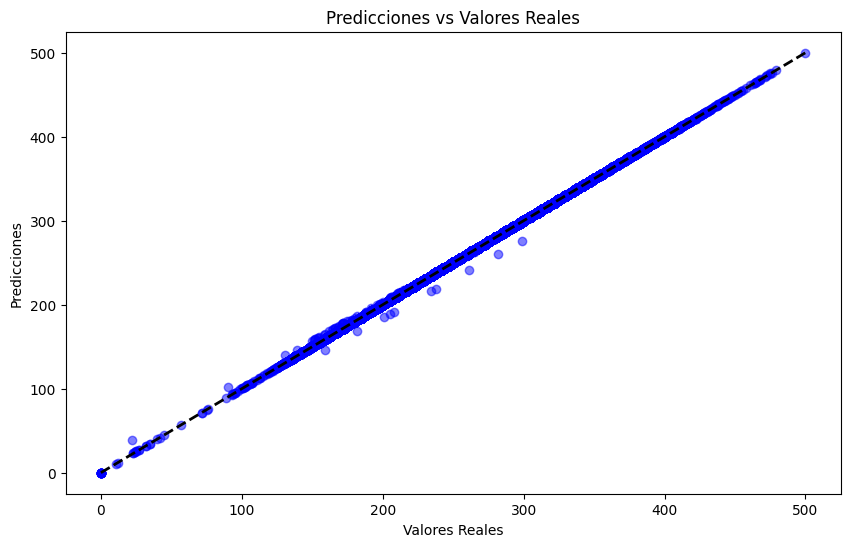

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import gradio as gr
import matplotlib.pyplot as plt
import tempfile

In [20]:
# Seleccionar las variables de interés
X = data[['PUNT_LECTURA_CRITICA']]  # Variable independiente
y = data['PUNT_GLOBAL']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Función para hacer predicciones y mostrar la gráfica
def predict_and_plot(puntaje_lectura_critica):
    # Realizar la predicción
    puntaje_global_predicho = model.predict([[puntaje_lectura_critica]])[0]
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
    plt.scatter(puntaje_lectura_critica, puntaje_global_predicho, color='yellow', label='Predicción')
    plt.title('Regresión Lineal Simple con Predicción')
    plt.xlabel('Puntaje Lectura Crítica')
    plt.ylabel('Puntaje Global')
    plt.legend()
    
    # Guardar la gráfica en un archivo temporal
    tmpfile = tempfile.NamedTemporaryFile(suffix='.png', delete=False)
    plt.savefig(tmpfile.name)
    plt.close()  # Cerramos la figura para evitar duplicados en Gradio
    
    return puntaje_global_predicho, tmpfile.name

In [40]:
#grafica puntale global vs departamento

def grafico_puntajeGlobal_vs_departamento():
    plt.figure(figsize=(12, 8))
    data.groupby('ESTU_DEPTO_RESIDE')['PUNT_GLOBAL'].sum().sort_values(ascending=False).plot(kind='bar')
    plt.title('Distribución del puntaje global por departamento')
    plt.xlabel('Departamento')
    plt.ylabel('Puntaje global')
    plt.xticks(rotation=45, ha='right')
    plt.show()

 # Guardar la gráfica en un archivo temporal
    tmpfile = tempfile.NamedTemporaryFile(suffix='.png', delete=False)
    plt.savefig(tmpfile.name)
    plt.close()
    
    return tmpfile.name

In [46]:
#grafica puntale global vs departamento

def genero_vs_puntajeGlobal():
    # Agrupar por género y sumar los puntajes
   grouped_data = data.groupby('ESTU_GENERO')['PUNT_GLOBAL'].sum()

   # Crear el gráfico de torta
   fig, ax = plt.subplots()
   ax.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
   ax.axis('equal')  # Para asegurar que el gráfico de torta sea un círculo

   # Título del gráfico
   plt.title('Distribución de Puntajes por Género')

   # Mostrar el gráfico
   plt.show()
    

 # Guardar la gráfica en un archivo temporal
   tmpfile = tempfile.NamedTemporaryFile(suffix='.png', delete=False)
   plt.savefig(tmpfile.name)
   plt.close()
    
   return tmpfile.name

In [47]:
# Crear la interfaz de Gradio
inputs = gr.Slider(minimum=0, maximum=100, step=1, label="Puntaje Lectura Crítica")
outputs = [
    gr.Textbox(label="Puntaje Global Predicho"), 
    gr.Image(label="Gráfica de Regresión")
    
    ]

# Interfaz para la función de predicción y gráfico
predict_interface = gr.Interface(fn=predict_and_plot, inputs=inputs, outputs=outputs, live=True)

# Interfaz completa con el dataframe estático y los gráficos adicionales
with gr.Blocks() as demo:
    gr.Markdown("# Interfaz de Predicción y Datos")
    with gr.Row():
        with gr.Column():
            predict_interface.render()  # Renderizamos la interfaz de predicción
        with gr.Column():
            gr.Dataframe(data.sample(2000), label="Datos")
    with gr.Row():
        with gr.Column():
            gr.Interface(fn=grafico_puntajeGlobal_vs_departamento, inputs=[], outputs=gr.Image(label="Distribución del puntaje global por departamento")).render()
        with gr.Column():
            gr.Interface(fn=genero_vs_puntajeGlobal, inputs=[], outputs=gr.Image(label="Distribución de Puntajes por Género")).render()

# Iniciar la interfaz


In [48]:
# Iniciar la interfaz
demo.launch()

Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\JUAN_CRUZ_CASA\AppData\Local\Temp\ipykernel_8576\2567793770.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\JUAN_CRUZ_CASA\AppData\Local\Temp\ipykernel_8576\1345520144.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
